In [16]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [17]:
coingecko_raw = pd.read_parquet('/home/giujorge/datalake/lab/Crypto/time_series/data/raw/btc_coingecko_2021_11_06.parquet.gzip')
coingecko_raw

,time,price,volume
0,2021-08-08 5:00pm,43688.800335,3.823226e+10
1,2021-08-08 6:00pm,43881.315462,3.864924e+10
2,2021-08-08 7:00pm,43704.071223,3.877861e+10
3,2021-08-08 8:00pm,43572.946706,3.947603e+10
4,2021-08-08 9:01pm,43774.500948,3.997882e+10
...,...,...,...
2158,2021-11-06 1:03pm,60493.366134,3.134038e+10
2159,2021-11-06 2:00pm,60726.486973,3.088214e+10
2160,2021-11-06 3:04pm,60903.717023,3.093378e+10
2161,2021-11-06 4:02pm,60958.906243,3.000314e+10


In [18]:
coingecko_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2163 non-null   object 
 1   price   2163 non-null   float64
 2   volume  2163 non-null   float64
dtypes: float64(2), object(1)
memory usage: 50.8+ KB


In [19]:
coingecko_raw['time'] = pd.to_datetime(coingecko_raw['time'])

In [20]:
coingecko_raw.set_index('time', inplace=True)
coingecko_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2021-08-08 17:00:00 to 2021-11-06 16:05:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2163 non-null   float64
 1   volume  2163 non-null   float64
dtypes: float64(2)
memory usage: 50.7 KB


# Basic Statistics

In [21]:
coingecko_raw.describe()

,price,volume
count,2163.000000,2.163000e+03
mean,51422.351355,3.649817e+10
std,6950.551668,6.686955e+09
min,40554.383792,2.459905e+10
25%,46175.944943,3.177417e+10
50%,48594.478087,3.545397e+10
75%,58649.320879,3.987395e+10
max,67118.891946,7.736656e+10


In [22]:
coingecko_raw.isnull().sum()

price     0
volume    0
dtype: int64

#  Plotting

[Text(0, 0.5, 'Price')]

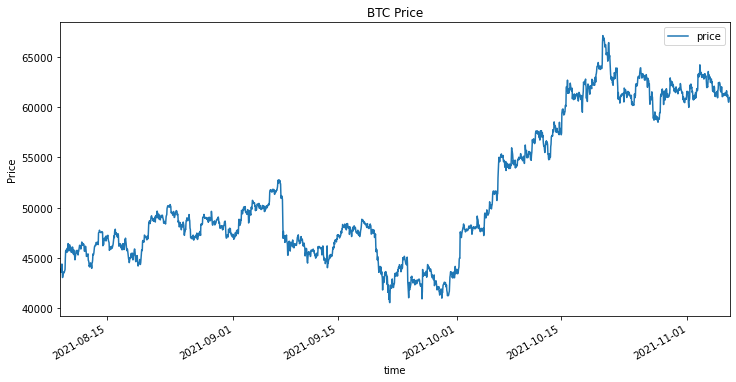

In [23]:
title = 'BTC Price'
ylabel='Price'
ax = coingecko_raw[['price']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)

[Text(0, 0.5, 'Volume')]

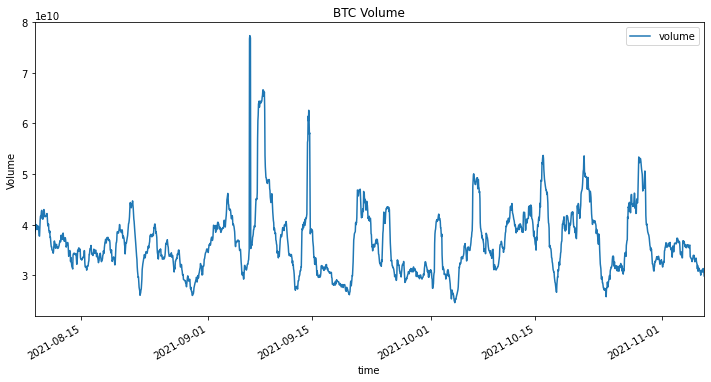

In [24]:
title = 'BTC Volume'
ylabel='Volume'
ax = coingecko_raw[['volume']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)

In [25]:
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

<AxesSubplot:xlabel='time'>

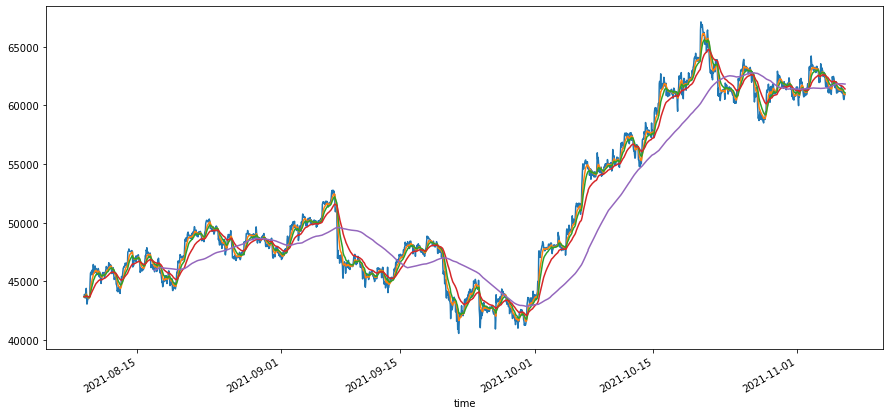

In [26]:
coingecko_raw['EMA10'] = coingecko_raw['price'].ewm(span=10, adjust=False).mean()
coingecko_raw['EMA20'] = coingecko_raw['price'].ewm(span=20, adjust=False).mean()
coingecko_raw['EMA50'] = coingecko_raw['price'].ewm(span=50, adjust=False).mean()
coingecko_raw['SMA200'] = coingecko_raw['price'].rolling(200).mean()

coingecko_raw['price'].plot(figsize = (15,7))
coingecko_raw['EMA10'].plot()
coingecko_raw['EMA20'].plot()
coingecko_raw['EMA50'].plot()
coingecko_raw['SMA200'].plot()

<AxesSubplot:xlabel='time'>

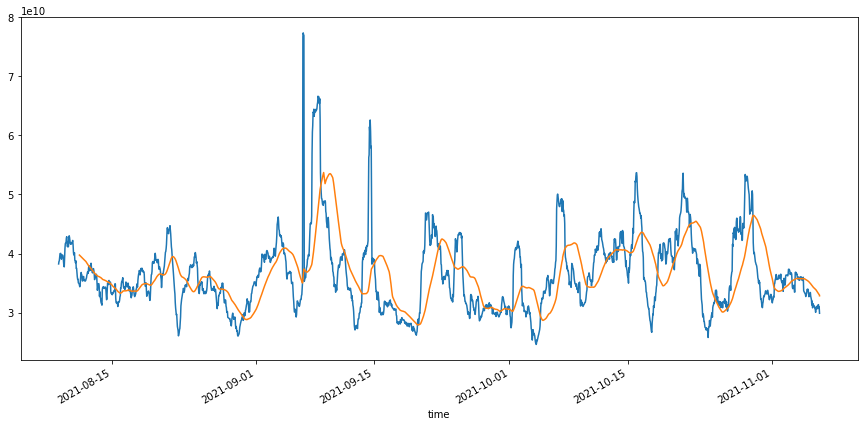

In [27]:
coingecko_raw['vol60avg'] = coingecko_raw['volume'].rolling(60).mean()

coingecko_raw['volume'].plot(figsize = (15,7))
coingecko_raw['vol60avg'].plot()

## Returns

In [28]:
coingecko_raw['price_Lag'] = coingecko_raw['price'].shift(1)

In [29]:
coingecko_raw['hourly_returns'] = (coingecko_raw['price_Lag']/coingecko_raw['price']) -1
coingecko_raw

,price,volume,EMA10,EMA20,EMA50,SMA200,vol60avg,price_Lag,hourly_returns
time,,,,,,,,,
2021-08-08 17:00:00,43688.800335,3.823226e+10,43688.800335,43688.800335,43688.800335,NaN,NaN,NaN,NaN
2021-08-08 18:00:00,43881.315462,3.864924e+10,43723.803085,43707.135109,43696.349947,NaN,NaN,43688.800335,-4.387178e-03
2021-08-08 19:00:00,43704.071223,3.877861e+10,43720.215474,43706.843310,43696.652743,NaN,NaN,43881.315462,4.055554e-03
2021-08-08 20:00:00,43572.946706,3.947603e+10,43693.439334,43694.091253,43691.801525,NaN,NaN,43704.071223,3.009310e-03
2021-08-08 21:01:00,43774.500948,3.997882e+10,43708.177809,43701.749319,43695.044640,NaN,NaN,43572.946706,-4.604376e-03
...,...,...,...,...,...,...,...,...,...
2021-11-06 13:03:00,60493.366134,3.134038e+10,60968.075256,61159.146122,61488.272944,61822.833015,3.319604e+10,60529.506230,5.974225e-04
2021-11-06 14:00:00,60726.486973,3.088214e+10,60924.150114,61117.940488,61458.398985,61821.610808,3.311502e+10,60493.366134,-3.838866e-03
2021-11-06 15:04:00,60903.717023,3.093378e+10,60920.435006,61097.538254,61436.646751,61819.442015,3.303663e+10,60726.486973,-2.910004e-03


<AxesSubplot:xlabel='time'>

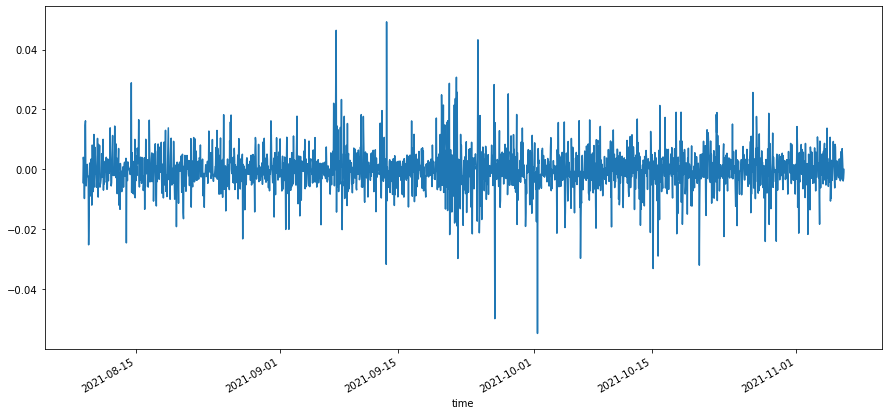

In [30]:
coingecko_raw['hourly_returns'].plot(figsize = (15,7))

## Time marks 

In [31]:
coingecko_raw['hour'] = coingecko_raw.index.hour

In [32]:
coingecko_raw['day'] = coingecko_raw.index.day

In [33]:
coingecko_raw['month'] = coingecko_raw.index.month

In [34]:
coingecko_raw['dayofweek'] = coingecko_raw.index.dayofweek

In [35]:
coingecko_raw.head()

,price,volume,EMA10,EMA20,EMA50,SMA200,vol60avg,price_Lag,hourly_returns,hour,day,month,dayofweek
time,,,,,,,,,,,,,
2021-08-08 17:00:00,43688.800335,3.823226e+10,43688.800335,43688.800335,43688.800335,NaN,NaN,NaN,NaN,17,8,8,6
2021-08-08 18:00:00,43881.315462,3.864924e+10,43723.803085,43707.135109,43696.349947,NaN,NaN,43688.800335,-0.004387,18,8,8,6
2021-08-08 19:00:00,43704.071223,3.877861e+10,43720.215474,43706.843310,43696.652743,NaN,NaN,43881.315462,0.004056,19,8,8,6
2021-08-08 20:00:00,43572.946706,3.947603e+10,43693.439334,43694.091253,43691.801525,NaN,NaN,43704.071223,0.003009,20,8,8,6
2021-08-08 21:01:00,43774.500948,3.997882e+10,43708.177809,43701.749319,43695.044640,NaN,NaN,43572.946706,-0.004604,21,8,8,6


### Hours

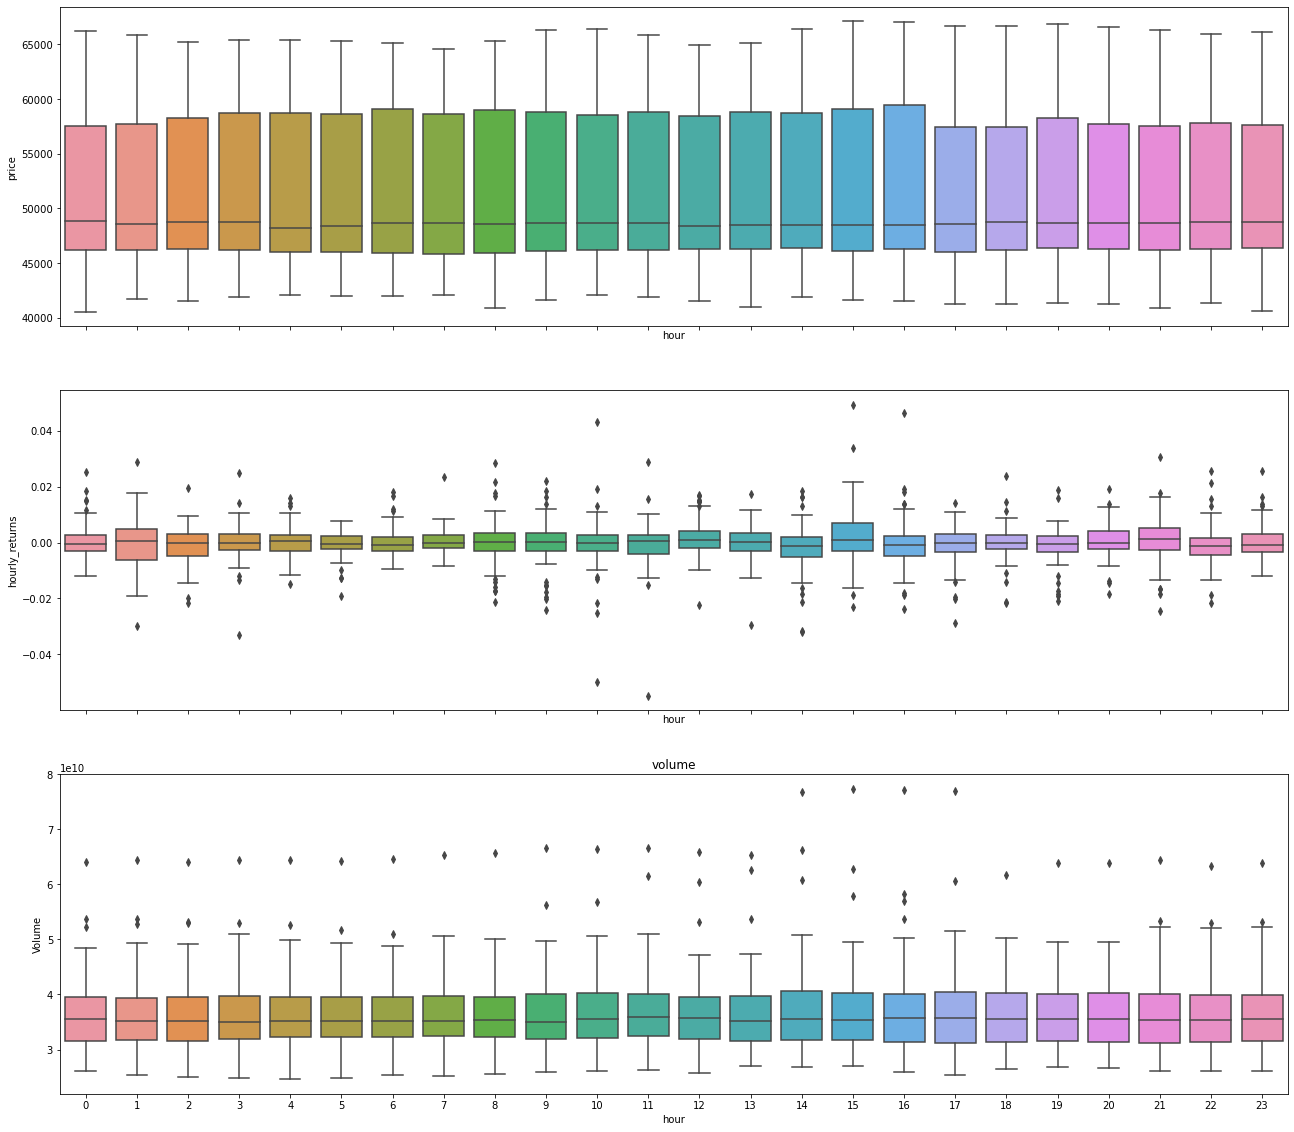

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=True)
for name, ax in zip(['price', 'hourly_returns', 'volume'], axes):
    sns.boxplot(data=coingecko_raw, x='hour', y=name, ax=ax)
ax.set_ylabel('Volume')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

- Variation les plus importantes vers 15h, 21h et 1h. \
- Légère baisse des volumes avant ouverture session américaine \
==> le marché est calé sur l'activité américane

### Day of week

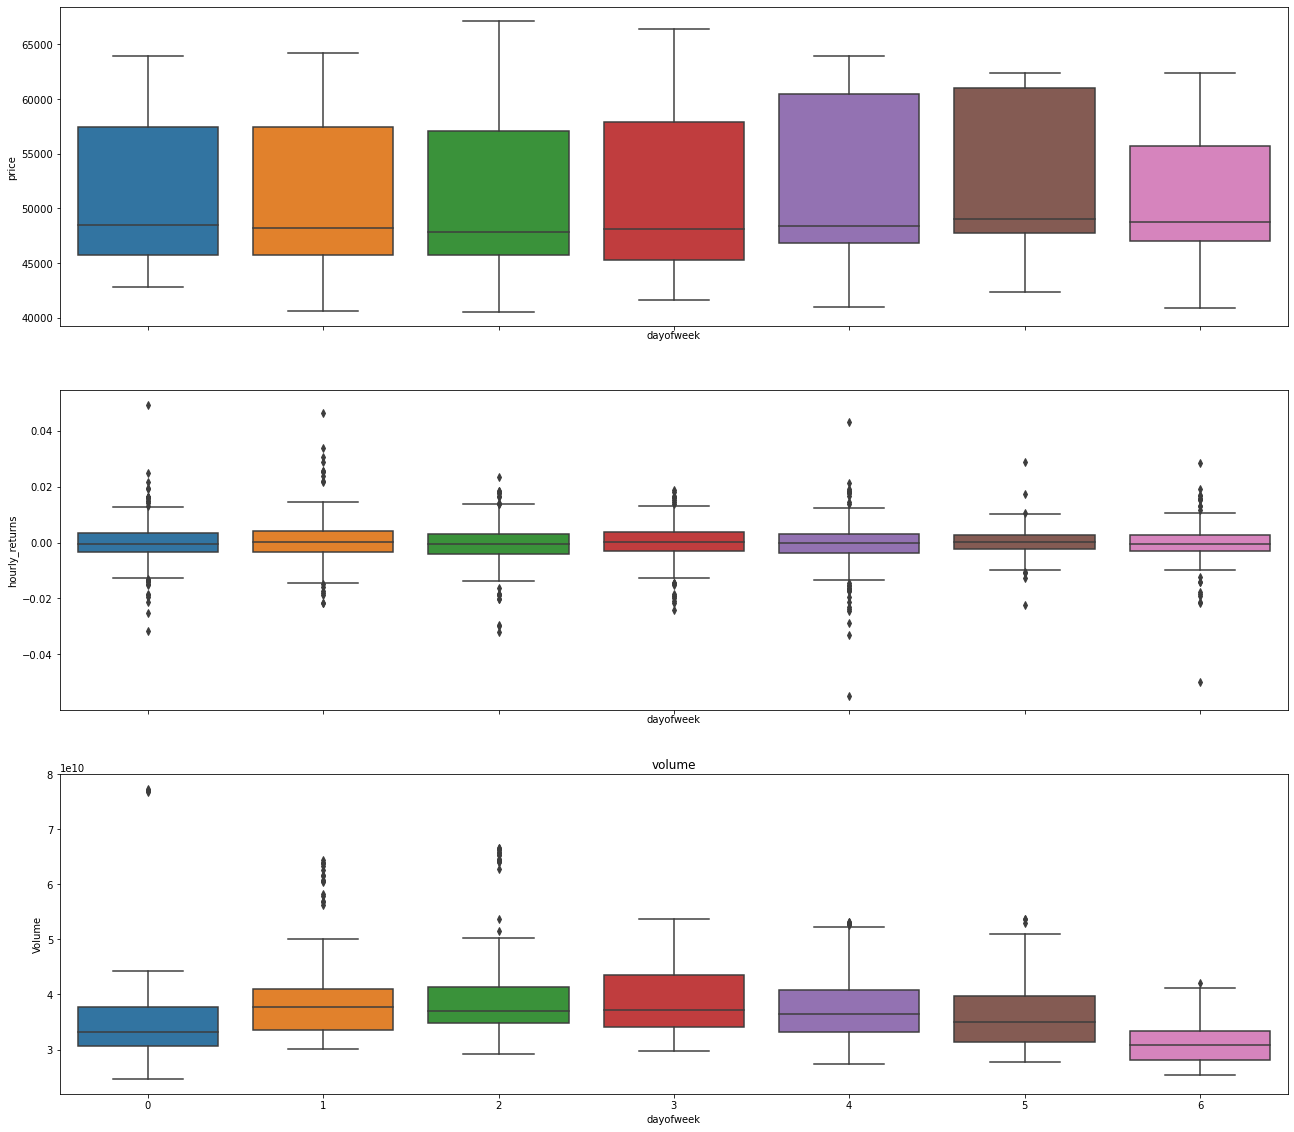

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=True)
for name, ax in zip(['price', 'hourly_returns', 'volume'], axes):
    sns.boxplot(data=coingecko_raw, x='dayofweek', y=name, ax=ax)
ax.set_ylabel('Volume')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

- L'activité est la plus importante le jeudi
- Dimanche et lundi sont des jours où les volumes sont aux plus bas (il manque un dimanche par rapport aux autres jours et une partie du samedi)
- Variation des prix, les plus importantes le vendredi et samedi avec un frétillement le jeudi. 
 - Attention aux valeurs extremes en milieu de semaine et le dimanche.

### Day of Month

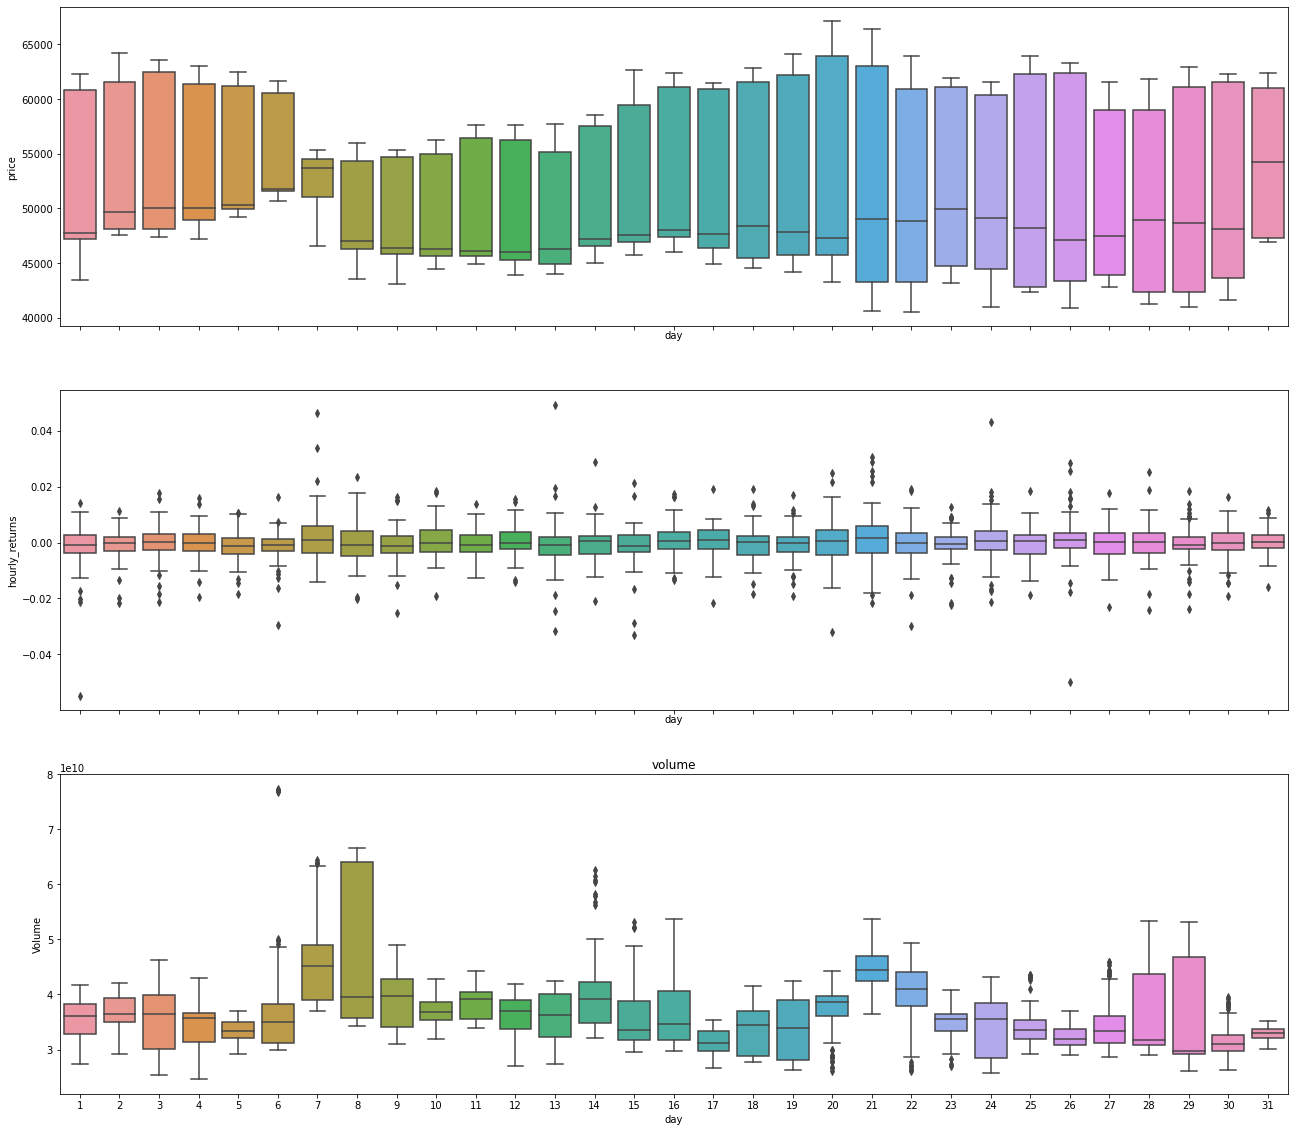

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=True)
for name, ax in zip(['price', 'hourly_returns','volume'], axes):
    sns.boxplot(data=coingecko_raw, x='day', y=name, ax=ax)
ax.set_ylabel('Volume')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

- Variablité des prix qui se contract jusqu'au 8 puis la variablité croit.
- moyenne nettement superieur du 31 au 8.
- Les volumes montent entre le 6 et 7 (apport des particuliers, institutions?)
- Les volumes aux plus bas le 17 puis ils remontent jusqu'au 21.
- Lors de la fin de mois, Les volumes  baissent du à la fin des contracts futurs et liquidation des comptes?

### Month

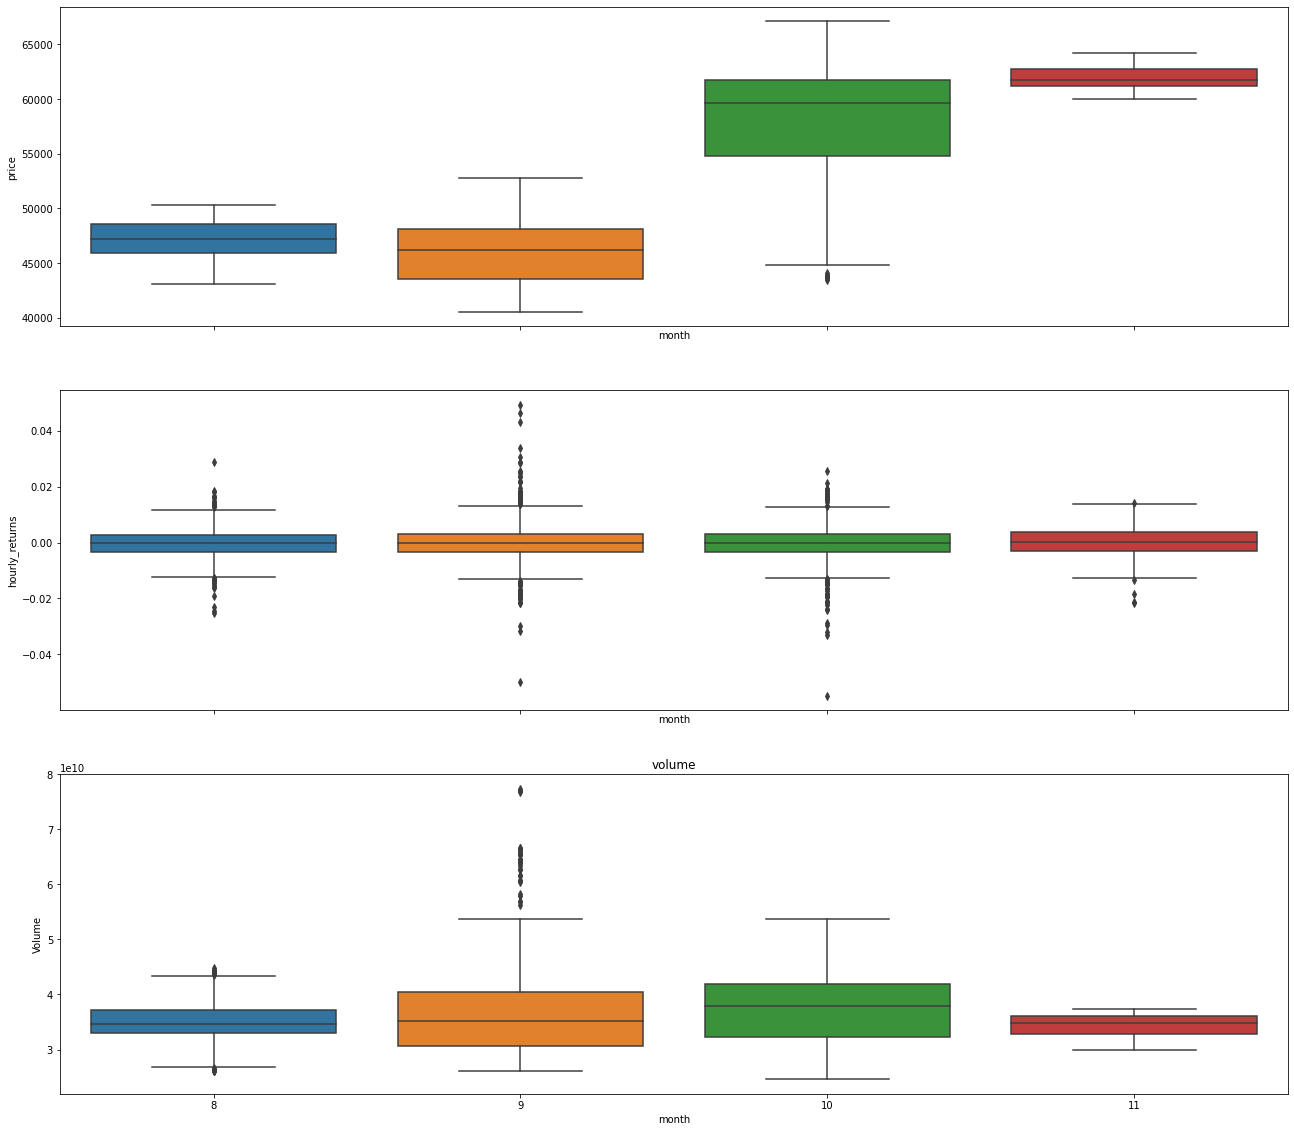

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=True)
for name, ax in zip(['price', 'hourly_returns', 'volume'], axes):
    sns.boxplot(data=coingecko_raw, x='month', y=name, ax=ax)
ax.set_ylabel('Volume')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

- L'écart de prix des précédants graphiques est pricipalement  du à la différence des prix entre les mois. En effet, depuis deux mois, les prix ont fortement augmentés.
- Le mois de nombre n'est pas representatifs car les données de ce mois ne contiennent qu'une semaine.

## Correlation 

In [50]:
coingecko_raw['price'].corr(coingecko_raw['volume'])

0.15249813660434977